# Graphical comparison of the results of replication of Rapach (2010)

This section compares the results of the replication of Rapach (2010) with the results of the original paper. The results of the replication of the original paper are taken from the file [ANALYSIS_prediction_performance.ipynb](ANALYSIS_prediction_performance.ipynb).

In [132]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

%matplotlib inline

Load the performance data of the replication of Rapach (2010) and the original paper

In [15]:
linear_pred_performance_CL = Table.read('../../table/performance of linear prediction using quarterly data 1965 - 2005.tex').to_pandas()
linear_pred_performance_CL.set_index('col0', inplace=True)
linear_pred_performance_CL.index.name = None
linear_pred_performance_CL

,R2,significance,Utility Gain
Dividend Price Ratio,-0.381,0.32,0.171
Dividend Yield,-0.444,0.279,0.916
Earnings Price Ratio,-0.367,0.672,-0.617
Earnings Payout Ratio,-1.473,0.653,-0.247
Stock Variance,-10.577,0.042 **,-0.218
Book To Market,-2.553,0.759,-2.415
Net Equity Expansion,-0.901,0.61,0.029
Treasury Bill,-1.610,0.076 *,3.133
Long Term Yield,-2.415,0.279,3.049
Long Term Return,0.602,0.217,1.339


In [21]:
linear_pred_performance_Rapach = Table.read('../../table/performance of linear prediction using quarterly data Rapach 2010.tex').to_pandas()
linear_pred_performance_Rapach.set_index('col0', inplace=True)
linear_pred_performance_Rapach.index.name = None
linear_pred_performance_Rapach

,R2,Utility Gain
D / P,0.34,0.55
D / Y,0.25,1.41
E / P,0.36,0.64
D / E,-1.42,0.58
SVAR,-12.97,0.13
B / M,-2.60,-0.58
NTIS,-0.91,0.08
TBL,-2.78,2.60
LTY,-3.09,2.29
LTR,0.33,1.30


Create a mapping from the original paper's model names to the replication's model names

In [22]:
econ_predictor_abbrev_to_full_name = {}
econ_predictor_full_name_to_abbrev = {}
for full_name, abbrev in zip(linear_pred_performance_CL.index, linear_pred_performance_Rapach.index):
    econ_predictor_abbrev_to_full_name[abbrev] = full_name
    econ_predictor_full_name_to_abbrev[full_name] = abbrev

In [23]:
econ_predictor_full_name_to_abbrev

{'Dividend Price Ratio': 'D / P',
 'Dividend Yield': 'D / Y',
 'Earnings Price Ratio': 'E / P',
 'Earnings Payout Ratio': 'D / E',
 'Stock Variance': 'SVAR',
 'Book To Market': 'B / M',
 'Net Equity Expansion': 'NTIS',
 'Treasury Bill': 'TBL',
 'Long Term Yield': 'LTY',
 'Long Term Return': 'LTR',
 'Term Spread': 'TMS',
 'Default Yield Spread': 'DFY',
 'Default Return Spread': 'DFR',
 'Inflation': 'INFL',
 'Invest Capital Ratio': 'I/K',
 'Mean': 'Mean',
 'Median': 'Median',
 'Trimmed mean': 'Trimmed mean',
 'DMSPE theta 1': 'DMSPE theta 1',
 'DMSPE theta 0.9': 'DMSPE theta 0.9'}

make the index name consistent

In [25]:
linear_pred_performance_Rapach.index = [econ_predictor_abbrev_to_full_name[abbrev] for abbrev in linear_pred_performance_Rapach.index]

Compare the R2

In [32]:
R2 = pd.concat([linear_pred_performance_CL['R2'], linear_pred_performance_Rapach['R2']], axis=1)
R2.columns = ['CL', 'Rapach']

In [149]:
def get_graphical_compare_of_replication(replication_df: pd.DataFrame,
                                        figsize: tuple = (10, 10),
                                        point_color: str = 'red',
                                        diagonal_lline_color: str = 'blue',
                                        arrow_color: str = 'black',):
        '''

        Parameters
        ----------
        replication_df : pd.DataFrame
                a dataframe with two columns, the first column is the replication result, the second column is the original result
        figsize : tuple
                the size of the figure
        point_color : str
                the color of the points
        diagonal_lline_color : str
                the color of the diagonal line
        arrow_color : str
                the color of the arrows
        
        Returns
        -------
        None
        '''
    
        max = replication_df.values.max()
        min = replication_df.values.min()

        fig = plt.figure(figsize=figsize)
        plt.scatter(replication_df.iloc[:, 0], replication_df.iloc[:, 1], color=point_color)
        plt.plot([min, max], [min, max], color=diagonal_lline_color, linestyle='dashed')

        plt.xlabel(replication_df.columns[0])
        plt.ylabel(replication_df.columns[1])
        texts = [plt.text(replication_df.iloc[i, 0], replication_df.iloc[i, 1], label) for i, label in enumerate(replication_df.index)]
        adjust_text(texts,arrowprops=dict(arrowstyle='->', color=arrow_color))
        
        plt.show()

        return fig


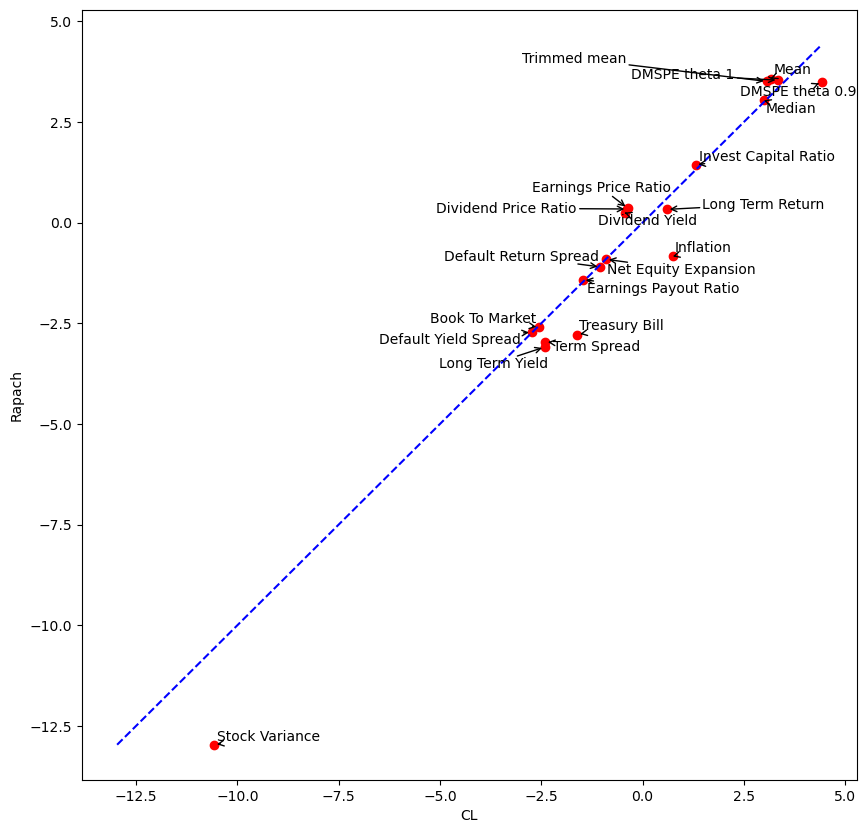

In [150]:
R2_plot = get_graphical_compare_of_replication(R2)

Compare the Utility Gain

In [151]:
utility_gain = pd.concat([linear_pred_performance_CL['Utility Gain'], linear_pred_performance_Rapach['Utility Gain']], axis=1)
utility_gain.columns = ['CL', 'Rapach']

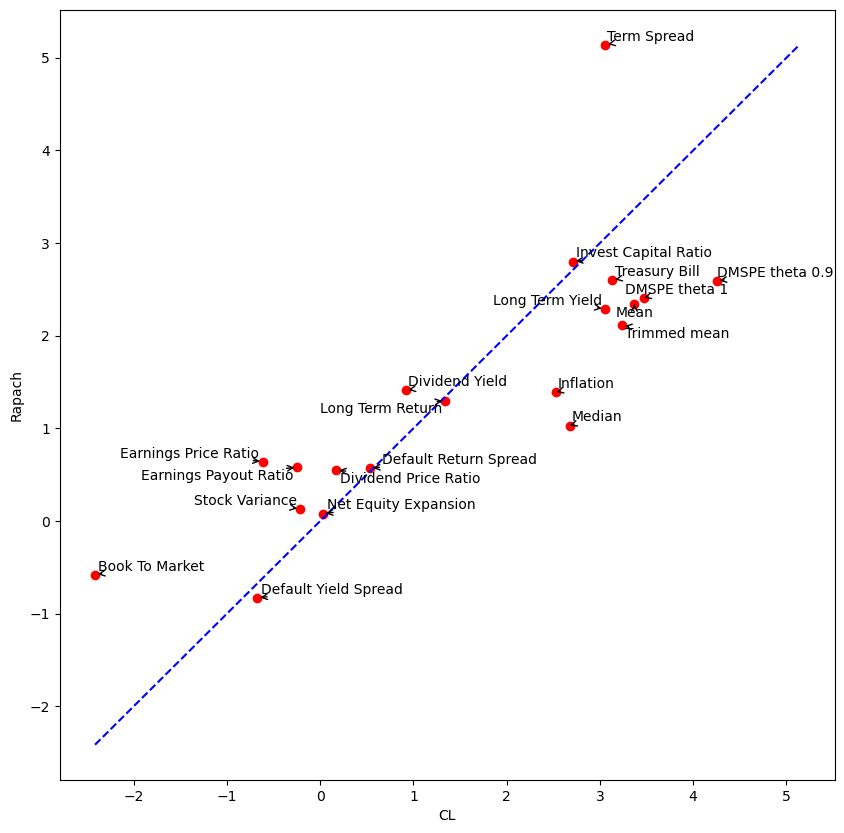

In [152]:
utility_gain_fig = get_graphical_compare_of_replication(utility_gain)

combine two figure togather

In [153]:
R2_plot.savefig('../../picture/replication_R2.png', bbox_inches='tight')
utility_gain_fig.savefig('../../picture/replication_utility_gain.png', bbox_inches='tight')